In [3]:
%%bash
conda install tqdm

Retrieving notices: done
Channels:
 - bioconda
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





## Package Plan ##

  environment location: /om2/user/mabdel03/conda_envs/python_data_analysis

  added / updated specs:
    - tqdm


The following NEW packages will be INSTALLED:

  colorama           conda-forge/noarch::colorama-0.4.6-pyhd8ed1ab_1 
  tqdm               conda-forge/noarch::tqdm-4.67.1-pyhd8ed1ab_1 

The following packages will be UPDATED:

  ca-certificates    conda-forge/linux-64::ca-certificates~ --> conda-forge/noarch::ca-certificates-2025.7.14-hbd8a1cb_0 
  certifi                            2025.1.31-pyhd8ed1ab_0 --> 2025.7.14-pyhd8ed1ab_0 
  openssl                                  3.4.1-h7b32b05_0 --> 3.5.1-h7b32b05_0 


Proceed ([y]/n)? 

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
%pylab inline
from collections import OrderedDict
import pickle
import numpy as np
import seaborn as sns
from tqdm import trange
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from scipy.spatial.distance import pdist,squareform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore') 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
def rename_groups(df):
    
    """
    Function that takes a dataframe as input
    Returns the same dataframe but with a new category column
    Category column contains updated group labels accounting for different controls
    """
    
    new_cat = []
    
    for row in df.index:
        """
        if df['group'][row].split('_')[0] == 'NGH':
            NGHtype = uuid_NameMap[df['uuid'][row]]
            if NGHtype.split('_')[-1].startswith('05'):
                new_cat.append('Ctrl-LNB')
            elif NGHtype.split('_')[-1].startswith('03'):
                new_cat.append('Ctrl-EE/SI')
        else:
        """
        new_cat.append(df['group'][row].split('_')[0])

    df['category'] = new_cat
    
    return df

In [3]:
def reformat_df(subset_df, metric_interest):
    """
    Take multi-index summary dataframe from Moseq fingerprint code as well as a metric of interest
    Reformat into single index dataframe for further analysis
    Returns dataframe with category label, position, uuid, and avg_time for that uuid in that metric
    """

    category = []
    position = []
    uuid_num = []
    avg_time = []
    
    for ix in subset_df[metric_interest]:
        for cat, uuid in subset_df[metric_interest][ix].index:
            category.append(cat)
            position.append(ix)
            uuid_num.append(uuid)
            avg_time.append(subset_df[metric_interest][ix][cat][uuid])
    
    
    return rename_groups(pd.DataFrame(data={'group': category, 'Metric': position, 'uuid': uuid_num, 'avg_time': avg_time}))


In [4]:
summary_df = pd.read_csv('/om2/user/mabdel03/files/BTI/Moseq_3-27-2025_Run/Offsprings/data/fingerprint_csv/FingerprintSummary_full.csv', index_col=[0, 1], header=[0, 1])
range_dict = pd.read_csv('/om2/user/mabdel03/files/BTI/Moseq_3-27-2025_Run/Offsprings/data/fingerprint_csv/FingerprintRangeDict_full.csv')

In [5]:
males_df = summary_df[summary_df.index.get_level_values('group').str.contains('Male')]

In [6]:
m_pos_df = reformat_df(males_df, 'dist_to_center_px')
m_height_df = reformat_df(males_df, 'height_ave_mm')
m_length_df = reformat_df(males_df, 'length_mm')
m_vel_df = reformat_df(males_df, 'velocity_2d_mm')
m_moseq_df = reformat_df(males_df, 'MoSeq')

In [7]:
m_pos_df

,group,Metric,uuid,avg_time,category
0,EE_Normal_Male,0,0e7e9b38-4cb6-400c-b0f5-6e4034920500,0.000111,EE
1,EE_Normal_Male,0,37e31c07-bedb-4afd-a128-9e8eea3e6ed6,0.000056,EE
2,EE_Normal_Male,0,50da788c-2302-41e3-bd7a-8e92b3e24d95,0.000028,EE
3,EE_Normal_Male,0,92b48143-ece8-4749-aff3-73be8f258ece,0.000223,EE
4,EE_Normal_Male,0,9af80187-1f8b-4a78-bdf6-9cdcaea7c7a8,0.000000,EE
...,...,...,...,...,...
3262,SI_Normal_Male,98,967cea17-5b5e-4166-b0da-81fa56b8ad1a,0.000000,SI
3263,SI_Normal_Male,98,a9a43e79-be6d-43f9-afcc-684fd0bdeafc,0.000000,SI
3264,SI_Normal_Male,98,be2c69ec-d004-4d52-b844-13e9634737ed,0.000000,SI
3265,SI_Normal_Male,98,d5fe97bf-c8c6-4400-bd91-1a355888d818,0.000000,SI


In [8]:
m_height_df

,group,Metric,uuid,avg_time,category
0,EE_Normal_Male,0,0e7e9b38-4cb6-400c-b0f5-6e4034920500,0.000000,EE
1,EE_Normal_Male,0,37e31c07-bedb-4afd-a128-9e8eea3e6ed6,0.000000,EE
2,EE_Normal_Male,0,50da788c-2302-41e3-bd7a-8e92b3e24d95,0.000000,EE
3,EE_Normal_Male,0,92b48143-ece8-4749-aff3-73be8f258ece,0.000306,EE
4,EE_Normal_Male,0,9af80187-1f8b-4a78-bdf6-9cdcaea7c7a8,0.000000,EE
...,...,...,...,...,...
3262,SI_Normal_Male,98,967cea17-5b5e-4166-b0da-81fa56b8ad1a,0.000000,SI
3263,SI_Normal_Male,98,a9a43e79-be6d-43f9-afcc-684fd0bdeafc,0.000000,SI
3264,SI_Normal_Male,98,be2c69ec-d004-4d52-b844-13e9634737ed,0.000000,SI
3265,SI_Normal_Male,98,d5fe97bf-c8c6-4400-bd91-1a355888d818,0.000000,SI


In [9]:
m_length_df

,group,Metric,uuid,avg_time,category
0,EE_Normal_Male,0,0e7e9b38-4cb6-400c-b0f5-6e4034920500,0.0,EE
1,EE_Normal_Male,0,37e31c07-bedb-4afd-a128-9e8eea3e6ed6,0.0,EE
2,EE_Normal_Male,0,50da788c-2302-41e3-bd7a-8e92b3e24d95,0.0,EE
3,EE_Normal_Male,0,92b48143-ece8-4749-aff3-73be8f258ece,0.0,EE
4,EE_Normal_Male,0,9af80187-1f8b-4a78-bdf6-9cdcaea7c7a8,0.0,EE
...,...,...,...,...,...
3262,SI_Normal_Male,98,967cea17-5b5e-4166-b0da-81fa56b8ad1a,0.0,SI
3263,SI_Normal_Male,98,a9a43e79-be6d-43f9-afcc-684fd0bdeafc,0.0,SI
3264,SI_Normal_Male,98,be2c69ec-d004-4d52-b844-13e9634737ed,0.0,SI
3265,SI_Normal_Male,98,d5fe97bf-c8c6-4400-bd91-1a355888d818,0.0,SI


In [10]:
m_moseq_df

,group,Metric,uuid,avg_time,category
0,EE_Normal_Male,0,0e7e9b38-4cb6-400c-b0f5-6e4034920500,0.030057,EE
1,EE_Normal_Male,0,37e31c07-bedb-4afd-a128-9e8eea3e6ed6,0.052456,EE
2,EE_Normal_Male,0,50da788c-2302-41e3-bd7a-8e92b3e24d95,0.039554,EE
3,EE_Normal_Male,0,92b48143-ece8-4749-aff3-73be8f258ece,0.038542,EE
4,EE_Normal_Male,0,9af80187-1f8b-4a78-bdf6-9cdcaea7c7a8,0.045168,EE
...,...,...,...,...,...
2041,SI_Normal_Male,61,967cea17-5b5e-4166-b0da-81fa56b8ad1a,0.000000,SI
2042,SI_Normal_Male,61,a9a43e79-be6d-43f9-afcc-684fd0bdeafc,0.000000,SI
2043,SI_Normal_Male,61,be2c69ec-d004-4d52-b844-13e9634737ed,0.000000,SI
2044,SI_Normal_Male,61,d5fe97bf-c8c6-4400-bd91-1a355888d818,0.000000,SI


In [11]:
fingerprints = OrderedDict()
#fingerprints['dist_to_center_px'] = np.vstack([m_pos_df[m_pos_df['uuid'] == uuid]['avg_time'].values for uuid in set(m_pos_df['uuid'])])

In [12]:
fingerprints['moseq'] = np.vstack([m_moseq_df[m_moseq_df['uuid'] == uuid]['avg_time'].values for uuid in set(m_moseq_df['uuid'])])

In [13]:
shape(fingerprints['moseq'])

(33, 62)

In [15]:
m_pos_df = reformat_df(males_df, 'dist_to_center_px')
m_height_df = reformat_df(males_df, 'height_ave_mm')
m_length_df = reformat_df(males_df, 'length_mm')
m_vel_df = reformat_df(males_df, 'velocity_2d_mm')
m_moseq_df = reformat_df(males_df, 'MoSeq')

m_pos_list = []
m_height_list = []
m_length__list = []
m_vel_list = []
m_moseq_list = []
labels = []

for ix, uuid in enumerate(list(set(m_pos_df['uuid']))):
    print(m_pos_df[m_pos_df['uuid'] == uuid].iloc[1]['category'])
    labels.append(m_pos_df[m_pos_df['uuid'] == uuid].iloc[1]['category'])
    m_pos_list.append(m_pos_df[m_pos_df['uuid'] == uuid]['avg_time'].values)
    m_height_list.append(m_height_df[m_height_df['uuid'] == uuid]['avg_time'].values)
    m_length__list.append(m_length_df[m_length_df['uuid'] == uuid]['avg_time'].values)
    m_vel_list.append(m_vel_df[m_vel_df['uuid'] == uuid]['avg_time'].values)
    m_moseq_list.append(m_moseq_df[m_moseq_df['uuid'] == uuid]['avg_time'].values)

NGH
NGH
LNB
EE
EE
NGH
NGH
SI
NGH
LNB
SI
NGH
SI
EE
SI
SI
LNB
LNB
NGH
NGH
NGH
NGH
NGH
EE
SI
LNB
EE
EE
SI
NGH
LNB
LNB
NGH


In [16]:
fingerprints = OrderedDict()
fingerprints['dist_to_center_px'] = np.vstack(m_pos_list)
fingerprints['height_ave_mm'] = np.vstack(m_height_list)
fingerprints['length_mm'] = np.vstack(m_length__list)
fingerprints['velocity_2d_mm'] = np.vstack(m_vel_list)
fingerprints['MoSeq'] = np.vstack(m_moseq_list)

fingerprint_labels = OrderedDict()
fingerprint_labels['condition'] = np.array(labels)

In [17]:
fingerprints

OrderedDict([('dist_to_center_px',
              array([[5.56281812e-05, 5.00653631e-04, 5.84095903e-04, ...,
                      1.66884544e-04, 2.78140906e-05, 0.00000000e+00],
                     [3.33722676e-04, 3.89343123e-04, 3.61532899e-04, ...,
                      5.56204461e-05, 1.39051115e-04, 0.00000000e+00],
                     [2.78179593e-05, 3.61633471e-04, 7.23266941e-04, ...,
                      1.11271837e-04, 5.56359185e-05, 0.00000000e+00],
                     ...,
                     [2.78140906e-05, 1.94698634e-04, 5.56281812e-04, ...,
                      0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                     [3.05989040e-04, 1.33522490e-03, 1.89156861e-03, ...,
                      1.11268742e-04, 5.56343709e-05, 0.00000000e+00],
                     [5.56281812e-05, 5.56281812e-05, 3.05954997e-04, ...,
                      4.17211359e-04, 5.56281812e-05, 0.00000000e+00]])),
             ('height_ave_mm',
              array([[1.11256

In [18]:
for item in fingerprints:
    print(shape(fingerprints[item]))

(33, 99)
(33, 99)
(33, 99)
(33, 99)
(33, 62)


In [19]:
max_len = max([fingerprints[item].shape[1] for item in fingerprints])  # Find the maximum number of features

# Pad all feature vectors to have the same length
for item in fingerprints:
    if fingerprints[item].shape[1] < max_len:
        padding = np.zeros((fingerprints[item].shape[0], max_len - fingerprints[item].shape[1]))
        fingerprints[item] = np.hstack([fingerprints[item], padding])  # Pad with zeros


In [20]:
fingerprints

OrderedDict([('dist_to_center_px',
              array([[5.56281812e-05, 5.00653631e-04, 5.84095903e-04, ...,
                      1.66884544e-04, 2.78140906e-05, 0.00000000e+00],
                     [3.33722676e-04, 3.89343123e-04, 3.61532899e-04, ...,
                      5.56204461e-05, 1.39051115e-04, 0.00000000e+00],
                     [2.78179593e-05, 3.61633471e-04, 7.23266941e-04, ...,
                      1.11271837e-04, 5.56359185e-05, 0.00000000e+00],
                     ...,
                     [2.78140906e-05, 1.94698634e-04, 5.56281812e-04, ...,
                      0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                     [3.05989040e-04, 1.33522490e-03, 1.89156861e-03, ...,
                      1.11268742e-04, 5.56343709e-05, 0.00000000e+00],
                     [5.56281812e-05, 5.56281812e-05, 3.05954997e-04, ...,
                      4.17211359e-04, 5.56281812e-05, 0.00000000e+00]])),
             ('height_ave_mm',
              array([[1.11256

In [21]:
for item in fingerprints:
    print(shape(fingerprints[item]))

(33, 99)
(33, 99)
(33, 99)
(33, 99)
(33, 99)


In [22]:
fingerprint_labels

OrderedDict([('condition',
              array(['NGH', 'NGH', 'LNB', 'EE', 'EE', 'NGH', 'NGH', 'SI', 'NGH', 'LNB',
                     'SI', 'NGH', 'SI', 'EE', 'SI', 'SI', 'LNB', 'LNB', 'NGH', 'NGH',
                     'NGH', 'NGH', 'NGH', 'EE', 'SI', 'LNB', 'EE', 'EE', 'SI', 'NGH',
                     'LNB', 'LNB', 'NGH'], dtype='<U3'))])

In [23]:
shape(fingerprint_labels['condition'])

(33,)

In [27]:
fingerprint_labels['condition']

array(['NGH', 'NGH', 'LNB', 'EE', 'EE', 'NGH', 'NGH', 'SI', 'NGH', 'LNB',
       'SI', 'NGH', 'SI', 'EE', 'SI', 'SI', 'LNB', 'LNB', 'NGH', 'NGH',
       'NGH', 'NGH', 'NGH', 'EE', 'SI', 'LNB', 'EE', 'EE', 'SI', 'NGH',
       'LNB', 'LNB', 'NGH'], dtype='<U3')

## Classifier-Fitting Code

In [24]:
def train_linear_classifier(features, labels, C=100.0, n_fold=1, test_size=0.2, seed=0):

    splits = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)\
               .split(features, labels)
    train_ind, test_ind = next(splits)
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', multi_class='auto', class_weight='balanced')
    model.fit(features[train_ind], labels[train_ind])
    pred_labels = model.predict(features[test_ind])
    scores = model.predict_proba(features[test_ind])
    true_labels = labels[test_ind]

    return true_labels, pred_labels, scores

## Choose a label level and other hyparparameters

In [25]:
label_level = 'condition' # also valid: class, dose
feature_types = ['dist_to_center_px', 'height_ave_mm', 'length_mm', 'velocity_2d_mm', 'MoSeq']
y = fingerprint_labels[label_level]
unique_labels = fingerprint_labels[label_level]
n_labels = len(unique_labels)
label_binarizer = LabelBinarizer().fit(np.arange(n_labels))

n_samples = 500 # for bootstrap measurements

In [26]:
label_binarizer

LabelBinarizer()

## Train a Classifier and Calculate Performance Metrics

In [35]:
from sklearn.metrics import precision_recall_curve, f1_score
from collections import OrderedDict
import numpy as np
from tqdm.auto import trange

# Initialize dictionaries to store results
precisions = OrderedDict()
recalls    = OrderedDict()
f1s        = OrderedDict()

# Only these two classes:
label_mapping = {'LNB': 0, 'NGH': 1}

for feature_type in feature_types:
    print(f'Working on {feature_type}')

    # Get data for the current feature type
    x = fingerprints[feature_type]

    # === NEW: filter out any samples whose label isn't LNB or NGH ===
    mask = np.isin(y, list(label_mapping.keys()))
    x_filtered = x[mask]
    y_filtered = y[mask]

    f1s[feature_type]     = []
    all_true_labels       = []
    all_scores            = []

    # Train a separate classifier for each seed
    for iseed in trange(n_samples):
        true_labels, pred_labels, scores = train_linear_classifier(
            x_filtered, y_filtered, seed=iseed
        )

        true_labels = np.array(true_labels)  # just to be safe
        all_true_labels.append(true_labels)
        all_scores.append(scores)

        # track per-seed F1
        per_label_f1 = f1_score(true_labels, pred_labels, average=None)
        f1s[feature_type].append(per_label_f1)

    # flatten across seeds
    all_true_labels = np.concatenate(all_true_labels)
    all_scores      = np.vstack(all_scores)

    # map to 0/1
    all_true_int = np.array([label_mapping[label] for label in all_true_labels])

    # compute PR curve for the “positive” class (NGH → index 1)
    precision, recall, _ = precision_recall_curve(
        all_true_int, all_scores[:, 1]
    )
    precisions[feature_type] = precision
    recalls[feature_type]    = recall

    # average F1 across seeds
    f1s[feature_type] = np.mean(f1s[feature_type], axis=0)

# finally, inspect
print(precisions)
print(recalls)
print(f1s)


Working on velocity_2d_mm


100%|████████████████████████████████████████| 500/500 [00:02<00:00, 195.96it/s]


Working on dist_to_center_px


100%|████████████████████████████████████████| 500/500 [00:02<00:00, 218.56it/s]


Working on height_ave_mm


100%|████████████████████████████████████████| 500/500 [00:02<00:00, 196.19it/s]


Working on length_mm


100%|████████████████████████████████████████| 500/500 [00:02<00:00, 189.57it/s]


Working on MoSeq


100%|████████████████████████████████████████| 500/500 [00:02<00:00, 198.92it/s]

OrderedDict({'velocity_2d_mm': array([0.75      , 0.74987494, 0.74974975, ..., 1.        , 1.        ,
       1.        ]), 'dist_to_center_px': array([0.75      , 0.74987494, 0.74974975, ..., 1.        , 1.        ,
       1.        ]), 'height_ave_mm': array([0.75      , 0.74987494, 0.74962444, ..., 1.        , 1.        ,
       1.        ]), 'length_mm': array([0.75      , 0.75037519, 0.75075075, ..., 1.        , 1.        ,
       1.        ]), 'MoSeq': array([0.75      , 0.75037519, 0.75075075, ..., 1.        , 1.        ,
       1.        ])})
OrderedDict({'velocity_2d_mm': array([1.00000000e+00, 9.99333333e-01, 9.98666667e-01, ...,
       1.33333333e-03, 6.66666667e-04, 0.00000000e+00]), 'dist_to_center_px': array([1.        , 0.99933333, 0.99866667, ..., 0.002     , 0.00133333,
       0.        ]), 'height_ave_mm': array([1.00000000e+00, 9.99333333e-01, 9.98000000e-01, ...,
       1.33333333e-03, 6.66666667e-04, 0.00000000e+00]), 'length_mm': array([1.00000000e+00, 1.00000000e

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from collections import OrderedDict
import numpy as np 
from tqdm.auto import trange

def train_linear_classifier(features, labels, C=100.0, test_size=0.2, seed=0):
    splits = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=seed
    ).split(features, labels)
    train_ind, test_ind = next(splits)

    model = LogisticRegression(
        penalty='l2',
        C=C,
        solver='lbfgs',
        multi_class='multinomial',  # ensure full multiclass
        class_weight='balanced'
    )
    model.fit(features[train_ind], labels[train_ind])
    pred_labels = model.predict(features[test_ind])
    scores     = model.predict_proba(features[test_ind])
    true_labels = labels[test_ind]

    return true_labels, pred_labels, scores

# --- parameters ---
label_level   = 'condition'
feature_types = ['dist_to_center_px', 'height_ave_mm', 'length_mm', 'velocity_2d_mm', 'MoSeq']
n_samples     = 500

# raw labels (strings)
y = fingerprint_labels[label_level]

# encode to 0,1,2,3
le         = LabelEncoder().fit(y)
classes    = le.classes_          # array(['EE','LNB','NGH','SI'],dtype=object)
n_classes  = len(classes)

# containers
precisions = {ft: {} for ft in feature_types}
recalls    = {ft: {} for ft in feature_types}
f1s        = {}

for feature_type in feature_types:
    print(f'Working on {feature_type}')
    x = fingerprints[feature_type]

    # per‐seed storage
    f1_boot = []
    all_true = []
    all_scores = []

    for seed in trange(n_samples):
        true_lbls, pred_lbls, scores = train_linear_classifier(x, y, seed=seed)

        # turn string labels into ints
        y_true_int = le.transform(true_lbls)   # shape=(n_test,)
        # y_pred_int = le.transform(pred_lbls) # only needed if you want inspect preds

        all_true.append(y_true_int)
        all_scores.append(scores)              # shape=(n_test, 4)

        # compute F1 per class for this seed
        y_pred_int = np.argmax(scores, axis=1)
        f1_boot.append(f1_score(y_true_int, y_pred_int, average=None))

    # flatten across seeds
    all_true   = np.concatenate(all_true)     # shape=(n_samples * n_test,)
    all_scores = np.vstack(all_scores)        # shape=(n_samples * n_test, 4)

    # compute per‐class PR curves
    y_bin = label_binarize(all_true, classes=np.arange(n_classes))
    for i, cls in enumerate(classes):
        p, r, _ = precision_recall_curve(y_bin[:, i], all_scores[:, i])
        precisions[feature_type][cls] = p
        recalls[feature_type][cls]    = r

    # average F1 across seeds
    mean_f1 = np.mean(f1_boot, axis=0)
    f1s[feature_type] = dict(zip(classes, mean_f1))

# inspect results
print("Precision curves:", precisions)
print("Recall curves:",    recalls)
print("Mean F1 scores:",   f1s)


Working on dist_to_center_px


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 145.54it/s]


Working on height_ave_mm


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 121.40it/s]


Working on length_mm


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 141.83it/s]


Working on velocity_2d_mm


100%|█████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 90.72it/s]


Working on MoSeq


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 129.92it/s]

Precision curves: {'dist_to_center_px': {'EE': array([0.14285714, 0.14289797, 0.14293882, ..., 1.        , 1.        ,
       1.        ]), 'LNB': array([0.214     , 0.21406116, 0.21412236, ..., 1.        , 1.        ,
       1.        ]), 'NGH': array([0.42857143, 0.42869391, 0.42881647, ..., 0.        , 0.        ,
       1.        ]), 'SI': array([0.21457143, 0.21463275, 0.21469411, ..., 0.5       , 0.        ,
       1.        ])}, 'height_ave_mm': {'EE': array([0.14285714, 0.14261217, 0.14236707, ..., 0.        , 0.        ,
       1.        ]), 'LNB': array([0.214     , 0.21406116, 0.21412236, ..., 0.        , 0.        ,
       1.        ]), 'NGH': array([0.42857143, 0.42869391, 0.42881647, ..., 0.        , 0.        ,
       1.        ]), 'SI': array([0.21457143, 0.21463275, 0.21469411, ..., 0.        , 0.        ,
       1.        ])}, 'length_mm': {'EE': array([0.14285714, 0.14289797, 0.14293882, ..., 1.        , 1.        ,
       1.        ]), 'LNB': array([0.214     , 0.21

#### Plotting utilities and settings

In [32]:
def make_label(feature_type):
    """Create a label for the legend based on the mean and standard error of the F1 scores."""
    return f'{feature_type} F1: {np.mean(f1s[feature_type]):.2f} ± {np.std(f1s[feature_type])/np.sqrt(n_samples):.2f}'

# Define feature-specific colors and line styles for your plot
feature_color = {
    'dist_to_center_px': '#1f77b4',  # Blue
    'height_ave_mm': '#ff7f0e',    # Orange
    'length_mm': '#2ca02c',    # Green
    'velocity_2d_mm': '#d62728',  # Red
    'MoSeq': '#9467bd',     # Purple
}

feature_mark = {
    'dist_to_center_px': '-',
    'height_ave_mm': '--',
    'length_mm': '-.',
    'velocity_2d_mm': ':',
    'MoSeq': '-',
}
"""
def plot_f1_scores(f1s, feature_types):
    #Plot F1 scores for each feature type with error bars.
    plt.figure(figsize=(10, 6))
    
    for feature_type in feature_types:
        f1_mean = np.mean(f1s[feature_type], axis=0)  # Mean F1 score across iterations
        f1_se = np.std(f1s[feature_type], axis=0) / np.sqrt(n_samples)  # Standard error across iterations

        # Plot with error bars
        plt.errorbar(
            range(len(f1_mean)),  # X-axis: iteration number
            f1_mean,              # Y-axis: mean F1 score
            yerr=f1_se,            # Error bars: standard error
            label=make_label(feature_type),
            color=feature_color.get(feature_type, 'black'),  # Default to black if color not defined
            linestyle=feature_mark.get(feature_type, '-'),   # Default to solid line if not found
            capsize=3,            # Error bar cap size
            marker='o'            # Marker for each point
        )

    plt.xlabel('Iteration')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores by Feature Type with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plot function with your f1s dictionary and feature types
plot_f1_scores(f1s, feature_types)
"""

"\ndef plot_f1_scores(f1s, feature_types):\n    #Plot F1 scores for each feature type with error bars.\n    plt.figure(figsize=(10, 6))\n    \n    for feature_type in feature_types:\n        f1_mean = np.mean(f1s[feature_type], axis=0)  # Mean F1 score across iterations\n        f1_se = np.std(f1s[feature_type], axis=0) / np.sqrt(n_samples)  # Standard error across iterations\n\n        # Plot with error bars\n        plt.errorbar(\n            range(len(f1_mean)),  # X-axis: iteration number\n            f1_mean,              # Y-axis: mean F1 score\n            yerr=f1_se,            # Error bars: standard error\n            label=make_label(feature_type),\n            color=feature_color.get(feature_type, 'black'),  # Default to black if color not defined\n            linestyle=feature_mark.get(feature_type, '-'),   # Default to solid line if not found\n            capsize=3,            # Error bar cap size\n            marker='o'            # Marker for each point\n        )\n\n   

#### Show Precision-Recall Curves and F1 scores

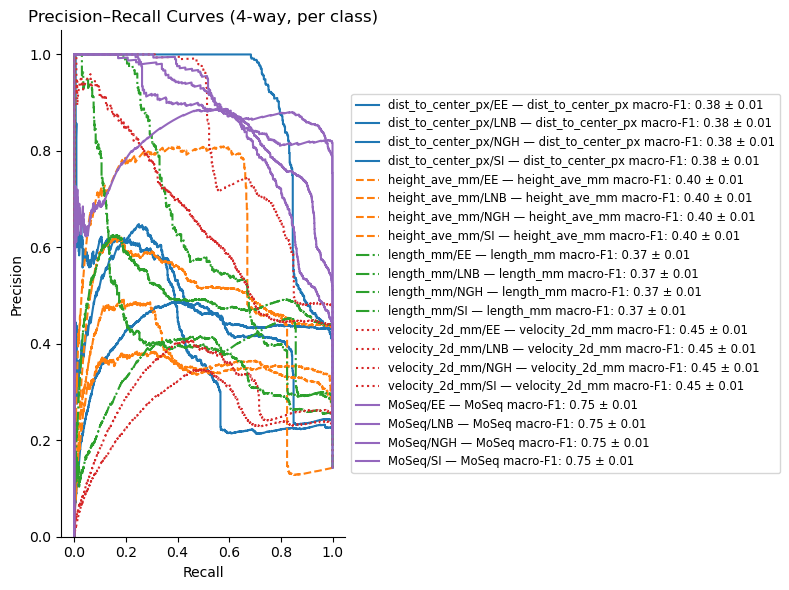

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection   import StratifiedShuffleSplit
from sklearn.linear_model      import LogisticRegression
from sklearn.preprocessing     import LabelEncoder, label_binarize
from sklearn.metrics           import precision_recall_curve, f1_score

# --- PARAMETERS & DATA YOU SHOULD ALREADY HAVE ---
# fingerprint_labels: your DataFrame/array of string labels under key label_level
# fingerprints:        your dict of feature‐type → (n_samples × n_features) arrays
# feature_types:       ['dist_to_center_px', 'height_ave_mm', 'length_mm', 'velocity_2d_mm', 'MoSeq']
# n_samples:           500  # number of bootstrap repetitions

label_level   = 'condition'
feature_color = {
    'dist_to_center_px': '#1f77b4',
    'height_ave_mm':     '#ff7f0e',
    'length_mm':         '#2ca02c',
    'velocity_2d_mm':    '#d62728',
    'MoSeq':             '#9467bd',
}
feature_mark = {
    'dist_to_center_px': '-',
    'height_ave_mm':     '--',
    'length_mm':         '-.',
    'velocity_2d_mm':    ':',
    'MoSeq':             '-',
}

# --- 1) ENCODE YOUR LABELS ---
y_raw = fingerprint_labels[label_level]             # array of strings
le    = LabelEncoder().fit(y_raw)
classes   = le.classes_                             # e.g. array(['EE','LNB','NGH','SI'])
n_classes = len(classes)

# --- 2) PREPARE CONTAINERS ---
f1_boot_dict = {}           # will hold (n_samples × n_classes) arrays
precisions   = {ft: {} for ft in feature_types}
recalls      = {ft: {} for ft in feature_types}
f1s          = {}           # mean F1 per class

# --- 3) BOOTSTRAP TRAINING LOOP ---
for feat in feature_types:
    X = fingerprints[feat]   # shape (N, d)
    f1_boot = []
    all_true = []
    all_scores = []

    splitter = StratifiedShuffleSplit(
        n_splits=1, test_size=0.2, random_state=0
    )
    for seed in range(n_samples):
        # one train/test split
        train_idx, test_idx = next(
            StratifiedShuffleSplit(
                n_splits=1, test_size=0.2, random_state=seed
            ).split(X, y_raw)
        )

        # fit multinomial logistic regression
        model = LogisticRegression(
            penalty='l2',
            C=100.0,
            solver='lbfgs',
            multi_class='multinomial',
            class_weight='balanced',
            max_iter=1000
        )
        model.fit(X[train_idx], y_raw[train_idx])

        # predict probabilities & true labels
        scores = model.predict_proba(X[test_idx])        # shape (n_test, n_classes)
        true_lbls = y_raw[test_idx]

        # encode true → ints 0..3
        true_int = le.transform(true_lbls)

        all_true.append(true_int)
        all_scores.append(scores)

        # compute per-class F1 for this seed
        pred_int = np.argmax(scores, axis=1)
        f1_per_label = f1_score(true_int, pred_int, average=None, labels=np.arange(n_classes))
        f1_boot.append(f1_per_label)

    # stack into (n_samples, n_classes)
    arr = np.vstack(f1_boot)
    f1_boot_dict[feat] = arr

    # store mean F1 per class
    mean_per_class = arr.mean(axis=0)
    f1s[feat] = dict(zip(classes, mean_per_class))

    # compute PR curves
    all_true = np.concatenate(all_true)   # (n_samples * n_test,)
    all_scores = np.vstack(all_scores)    # (n_samples * n_test, n_classes)
    y_bin = label_binarize(all_true, classes=np.arange(n_classes))

    for i, cls in enumerate(classes):
        p, r, _ = precision_recall_curve(y_bin[:, i], all_scores[:, i])
        precisions[feat][cls] = p
        recalls[feat][cls]    = r

# --- 4) MACRO‐F1 SUMMARIES FOR LEGEND ---
f1_macro_mean = {}
f1_macro_se   = {}
for feat, arr in f1_boot_dict.items():
    # arr: (n_samples, n_classes)
    macro_seed = arr.mean(axis=1)                # one macro-F1 per seed
    f1_macro_mean[feat] = macro_seed.mean()      # avg over seeds
    f1_macro_se[feat]   = macro_seed.std(ddof=1) / np.sqrt(arr.shape[0])

def make_label(feat):
    μ = f1_macro_mean[feat]
    σ = f1_macro_se[feat]
    return f'{feat} macro-F1: {μ:.2f} ± {σ:.2f}'

# --- 5) PLOT PRECISION–RECALL FOR EACH FEATURE×CLASS ---
plt.figure(figsize=(8, 6))
for feat in feature_types:
    for cls in classes:
        plt.plot(
            recalls[feat][cls],
            precisions[feat][cls],
            label=f'{feat}/{cls} — {make_label(feat)}',
            color=feature_color[feat],
            linestyle=feature_mark[feat]
        )

plt.title('Precision–Recall Curves (4-way, per class)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0, 1.05)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
sns.despine()
plt.tight_layout()
plt.show()


In [33]:
for feature_type in feature_types:
    label = make_label(feature_type)
    plot(recalls[feature_type], precisions[feature_type],
         label=label, color=feature_color[feature_type], 
         linestyle=feature_mark[feature_type])
title('Precision-Recall Curves')
xlabel('Recall')
ylabel('Precision')
ylim(0, 1.05)
legend(loc='center left', bbox_to_anchor=[1,0.5])
sns.despine()

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

## Cosine Distances Between Treatments

In [39]:
print("fingerprint_data keys:", list(fingerprints.keys()))


fingerprint_data keys: ['dist_to_center_px', 'height_ave_mm', 'length_mm', 'velocity_2d_mm', 'MoSeq']


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# 1) your cosine‐distance helper
cosine = lambda data: squareform(pdist(data, metric='cosine'))

def sim_matrix_of_avgs(data, labels):
    unique_labels = np.unique(labels)
    means = np.vstack([
        np.nanmean(data[labels == lbl], axis=0)
        for lbl in unique_labels
    ])
    return cosine(means), unique_labels

def show_cosine(data, labels, ticks):
    distmat, _ = sim_matrix_of_avgs(data, labels)
    plt.figure(figsize=(5,5))
    im = plt.imshow(distmat, cmap='viridis_r', vmin=0, vmax=1, interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04, label='Cosine distance')
    plt.xticks(np.arange(len(ticks)), ticks, rotation=90)
    plt.yticks(np.arange(len(ticks)), ticks)
    plt.axis('square')
    plt.title('Cosine Distance of Label Means')
    plt.tight_layout()
    plt.show()

# 2) define your two‐class mapping
label_mapping = {'NGH': 0, 'LNB': 1}

# 3) grab the raw string labels
orig_labels = np.array(fingerprint_labels['condition'])

# 4) build a mask that keeps only NGH and LNB samples
mask = np.isin(orig_labels, list(label_mapping.keys()))

# 5) apply mask to get filtered labels & numeric labels
filtered_str_labels = orig_labels[mask]
binary_labels       = np.array([label_mapping[l] for l in filtered_str_labels])

# 6) prepare your tick labels in the same order
unique_bin = np.unique(binary_labels)           # -> array([0,1])
tick_names = [k for k,v in label_mapping.items() if v in unique_bin]
#    ['NGH','LNB']  (order follows sorted(unique_bin))

# 7) now define a little helper that applies the SAME mask to each feature
def show_cosine_per_feature(fingerprint_data):
    for ft in feature_types:
        print(f"Working on feature: {ft}")
        data = fingerprint_data[ft][mask]     # only NGH/LNB rows
        show_cosine(data, binary_labels, tick_names)

# finally call it:
show_cosine_per_feature(fingerprint_data)


Working on feature: velocity_2d_mm


KeyError: 'velocity_2d_mm'

Working on feature: dist_to_center_px


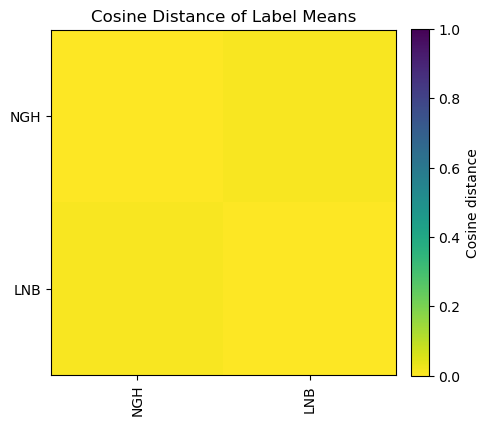

Working on feature: height_ave_mm


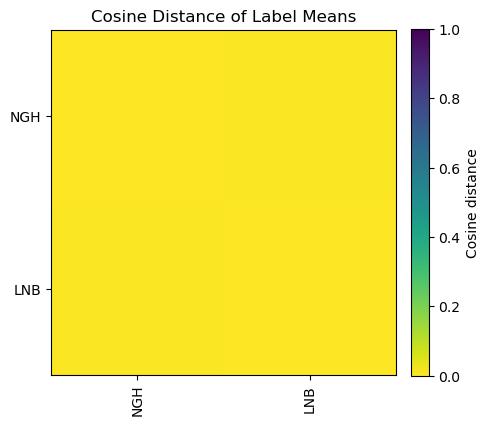

Working on feature: length_mm


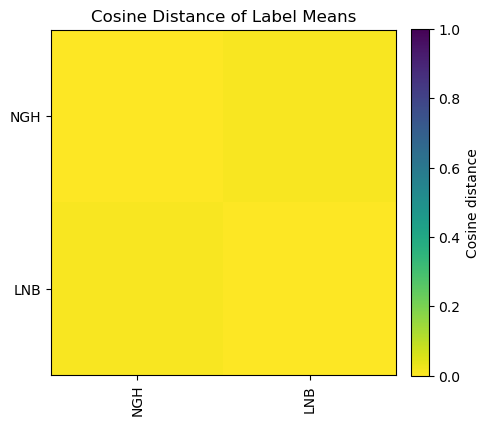

Working on feature: velocity_2d_mm


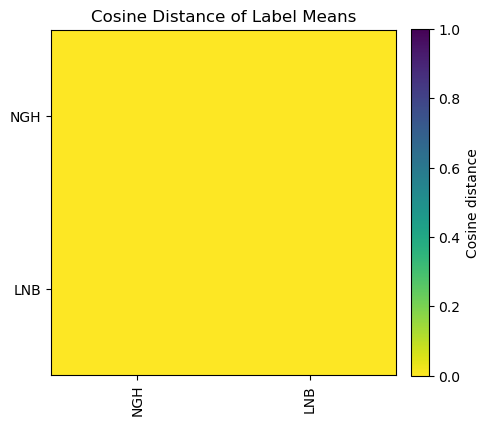

Working on feature: MoSeq


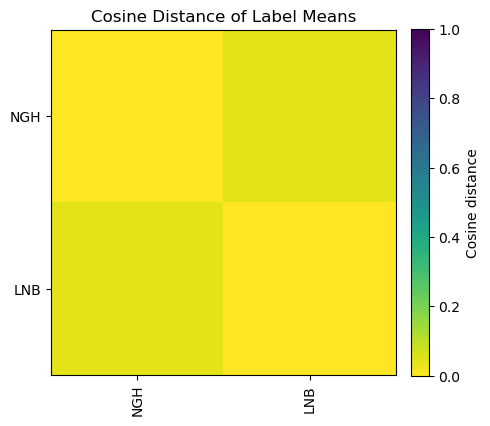

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# 1) cosine‐distance helper
def cosine(data):
    return squareform(pdist(data, metric='cosine'))

# 2) compute sim‐matrix of label means
def sim_matrix_of_avgs(data, labels):
    unique = np.unique(labels)
    means  = np.vstack([np.nanmean(data[labels == u], axis=0) for u in unique])
    return cosine(means), unique

# 3) display one matrix
def show_cosine(data, labels, ticks):
    distmat, _ = sim_matrix_of_avgs(data, labels)
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(distmat, cmap='viridis_r', vmin=0, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Cosine distance')
    ax.set_xticks(np.arange(len(ticks)))
    ax.set_xticklabels(ticks, rotation=90)
    ax.set_yticks(np.arange(len(ticks)))
    ax.set_yticklabels(ticks)
    ax.set_aspect('equal')
    ax.set_title('Cosine Distance of Label Means')
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 4) two‐class mapping
label_mapping   = {'NGH': 0, 'LNB': 1}
orig_labels     = np.array(fingerprint_labels['condition'])
mask            = np.isin(orig_labels, list(label_mapping.keys()))
binary_labels   = np.array([label_mapping[l] for l in orig_labels[mask]])
tick_names      = [lab for lab, _ in sorted(label_mapping.items(), key=lambda x: x[1])]

# 5) your feature dict is called `fingerprints`
feature_types = list(fingerprints.keys())

# 6) loop over features
def show_cosine_per_feature(data_dict, feature_types, mask, labels, ticks):
    for ft in feature_types:
        print(f"Working on feature: {ft}")
        arr = data_dict[ft]     # now using `fingerprints`
        filtered = arr[mask]
        show_cosine(filtered, labels, ticks)

# 7) call it
show_cosine_per_feature(
    fingerprints,      # your actual data dict
    feature_types,
    mask,
    binary_labels,
    tick_names
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.spatial.distance import pdist, squareform

# Cosine similarity function
cosine = lambda data: squareform(pdist(data, metric='cosine'))

def sim_matrix_of_avgs(data, labels):
    """Compute the cosine similarity matrix of averages for each label."""
    unique_labels = np.unique(labels)
    means = np.zeros((len(unique_labels), data.shape[1]))
    
    for i, ilabel in enumerate(unique_labels):
        means[i] = np.nanmean(data[labels == ilabel], axis=0)
    
    return cosine(means)

def show_cosine(data, labels):
    """Display the cosine similarity matrix."""
    cos_matrix = sim_matrix_of_avgs(data, labels)
    cax = plt.imshow(cos_matrix, cmap='viridis_r', clim=(0, 1.0), interpolation='none')
    plt.axis('square')
    return cax

# Assuming 'fingerprints' is a dictionary containing the data matrices for 'moseq' and 'position'
# and 'fingerprint_labels_binary' contains your binary labels ['NGH', 'LNB']
fingerprint_data = {
    'MoSeq': fingerprints['MoSeq'],
    'dist_to_center_px': fingerprints['dist_to_center_px']
}

# Short names for the labels (NGH, LNB)
short_names = ['NGH', 'LNB']

# Plot configuration
plt.figure(figsize=(8, 4))
gs = GridSpec(1, 3, width_ratios=[10, 10, 0.8])

# First plot: Moseq feature
ax1 = plt.subplot(gs[0])
cax1 = show_cosine(fingerprint_data['MoSeq'], fingerprint_labels_binary)
plt.title('Moseq', y=1.1)
plt.xticks(range(len(short_names)), short_names, rotation=90)
plt.yticks(range(len(short_names)), short_names)
sns.despine()

# Second plot: Position feature
ax2 = plt.subplot(gs[1])
cax2 = show_cosine(fingerprint_data['dist_to_center_px'], fingerprint_labels_binary)
plt.title('Position', y=1.1)
plt.xticks(range(len(short_names)), short_names, rotation=90)
plt.yticks(range(len(short_names)), short_names)
sns.despine()

# Colorbar
ax3 = plt.subplot(gs[2])
plt.colorbar(cax2, cax=ax3)

plt.tight_layout()
plt.show()


In [32]:
import numpy as np
from sklearn.metrics import f1_score
from collections import OrderedDict

# Initialize dictionaries to store results
classification_rates = OrderedDict()

label_mapping = {'LNB': 0, 'NGH': 1}  # Map 'LNB' to 0, 'NGH' to 1

# Feature types and labels for NGH/LNB
feature_types = ['velocity_2d_mm', 'dist_to_center_px', 'height_ave_mm', 'length_mm', 'MoSeq']
labels = ['NGH', 'LNB']

# Prepare a matrix to store F1 scores for each feature and label
classification_matrix = np.zeros((len(labels), len(feature_types)))

for j, feature_type in enumerate(feature_types):
    print(f'Working on {feature_type}')

    # Get data for the current feature type
    x = fingerprints[feature_type]
        
    all_true_labels = []
    all_scores = []
    f1s_per_label = []  # Store F1 scores for NGH and LNB

    # Train a separate classifier for each feature type across multiple seeds
    for iseed in trange(n_samples):
        true_labels, pred_labels, scores = train_linear_classifier(x, y, seed=iseed)
        
        # Ensure true_labels is treated as a numpy array
        true_labels = np.array(true_labels)
        
        # Replace 'LNB' with 0 and 'NGH' with 1 in true labels
        true_labels = np.array([label_mapping[label] for label in true_labels])

        # Ensure pred_labels are also mapped to 0 and 1 using label_mapping
        pred_labels = np.array([label_mapping[label] for label in pred_labels])

        # Accumulate true labels and predictions across seeds
        f1_per_seed = f1_score(true_labels, pred_labels, average=None)  # Get F1 for each class
        f1s_per_label.append(f1_per_seed)  # Append F1 scores for NGH and LNB
    
    # Average the F1 scores across seeds for each class
    f1s_per_label = np.mean(f1s_per_label, axis=0)

    # Store the F1 scores for NGH and LNB in the classification matrix
    for i, label in enumerate(labels):
        classification_matrix[i, j] = f1s_per_label[i]  # Store F1 score for NGH and LNB

# Now create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(classification_matrix, annot=True, cmap='viridis', xticklabels=feature_types, yticklabels=labels, cbar=True, vmin=0, vmax=1)

# Customize the plot
plt.title('Classification Rate per Label and Feature Type', fontsize=16)
plt.xlabel('Feature Type', fontsize=12)
plt.ylabel('Label', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Working on velocity_2d_mm


  0%|                                                   | 0/500 [00:00<?, ?it/s]


KeyError: 'SI'

## LDA Visualization of Mice Across Treatments

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(fingerprints['moseq'], fingerprint_labels['y_drug'])
p = lda.transform(fingerprints['moseq'])

In [12]:
drug_class = fingerprint_labels['drug_class']
unique_class = [b for a,b in zip([""]+drug_class,drug_class) if b!=a]
drug = fingerprint_labels['drug']
unique_drug = [b for a,b in zip([""]+drug,drug) if b!=a]

In [13]:
color_map = dict(zip(unique_class, sns.color_palette(palette='Paired', n_colors=len(unique_class))))
class_per_drug = []

colors_ = []
for drug_ in unique_drug:
    class_ = np.array(drug_class)[np.array(drug)==drug_][0]
    colors_.append(color_map[class_])

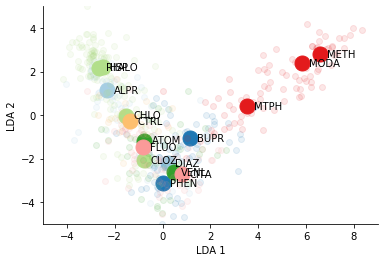

In [14]:
for i, treatment in enumerate(unique_drug):
    idx = fingerprint_labels['y_drug'] == i
    plot(p[idx, 0], p[idx, 1], 'o', alpha=0.1, color=colors_[i])
    x, y = np.mean(p[idx], axis=0)
    plot(x, y, 'o',
         markersize=15, color=colors_[i], label=short_name_map[treatment])
    text(x + 0.3, y, short_name_map[treatment], fontsize=10, verticalalignment='center', )
    
sns.despine()
ylim(-5, 5)
xlim(-5, 9)
xlabel('LDA 1')
ylabel('LDA 2');